In [4]:
# check GPU resource
!nvidia-smi

Sat Apr 22 07:31:14 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    52W / 400W |   9239MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# install requirements for using stable diffusion
!pip install diffusers==0.11.1
!pip install transformers scipy ftfy accelerate

In [6]:
import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)  
pipe_h = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4") # higher performance, but slower

torch_device = "cuda" if torch.cuda.is_available() else "cpu"

# move the pipelines to GPU
pipe = pipe.to(torch_device)
pipe_h = pipe_h.to(torch_device)

# image generation function
def generate_image(prompt, num_inference_steps=15, seed=42, high_quality=False):
  generator = torch.Generator(torch_device).manual_seed(seed)
  target_pipe = pipe_h if high_quality else pipe
  image = target_pipe(prompt, num_inference_steps=num_inference_steps, generator=generator).images[0]
  return image

Fetching 20 files:   0%|          | 0/20 [00:00<?, ?it/s]

The config attributes {'scaling_factor': 0.18215} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


Fetching 20 files:   0%|          | 0/20 [00:00<?, ?it/s]

The config attributes {'scaling_factor': 0.18215} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/15 [00:00<?, ?it/s]

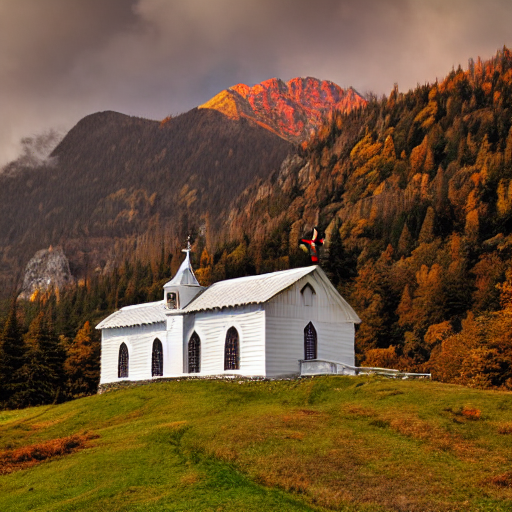

In [11]:
# test
test_prompt = "white church building on mountain, with some warm highlights to give the image a lively and cheerful feel."
generate_image(test_prompt, seed=1922883)